In [66]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
fashion_mnist=keras.datasets.fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [67]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [68]:
len(np.unique(train_labels))

10

#so we have 10 classes

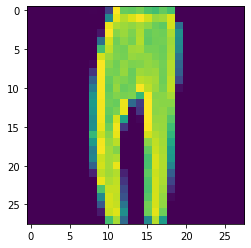

In [69]:
plt.imshow(train_images[86])

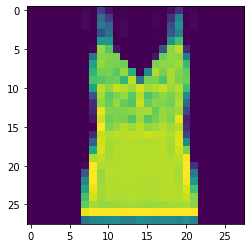

In [70]:
plt.imshow(train_images[591])

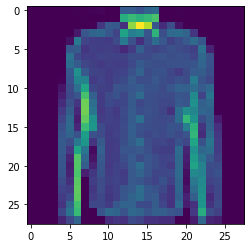

In [71]:
plt.imshow(train_images[975])

In [72]:
train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels=keras.utils.to_categorical(train_labels, num_classes=10)
test_labels=keras.utils.to_categorical(test_labels, num_classes=10)

In [75]:
test_images.shape

(10000, 28, 28)

In [76]:
train_images = train_images.reshape(60000,-1)
test_images = test_images.reshape(10000,-1)

In [77]:
test_images.shape

(10000, 784)

In [78]:
train_images = train_images.astype('float32')
train_images /= 255
test_images = test_images.astype('float32')
test_images /= 255

In [79]:
test_labels.shape

(10000, 10)

In [80]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=784))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 28,938
Trainable params: 28,938
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [84]:
model.fit(train_images, train_labels,
          epochs=30,
          batch_size=16, validation_split=0.2)

Epoch 1/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.3988 - accuracy: 0.8855 - val_loss: 1.0765 - val_accuracy: 0.8347
Epoch 2/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.4199 - accuracy: 0.8839 - val_loss: 0.9631 - val_accuracy: 0.8564
Epoch 3/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.4243 - accuracy: 0.8809 - val_loss: 1.1239 - val_accuracy: 0.8403
Epoch 4/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.4317 - accuracy: 0.8813 - val_loss: 0.9031 - val_accuracy: 0.8575
Epoch 5/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.4402 - accuracy: 0.8798 - val_loss: 0.9936 - val_accuracy: 0.8578
Epoch 6/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.4377 - accuracy: 0.8800 - val_loss: 1.0482 - val_accuracy: 0.8441
Epoch 7/30
3000/3000 [==============================] - 9s 3ms/step - loss: 0.4482 - accuracy: 0.8791 - val_loss: 0.8482 - val_accuracy:

In [86]:
loss, acc = model.evaluate(test_images, test_labels)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

313/313 [==============================] - 1s 2ms/step - loss: 2.0263 - accuracy: 0.8557

Testing loss: 2.03, acc: 0.86%
